<div style="border:solid Chocolate 2px; padding: 40px">

<b>Владислав, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю посмотрить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Введение есть, отлично

### Импорт библиотек и чтение исходного файла

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import math

try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

### Общая информация о датафрейме

Информация о столбца, типах данных и количествах строк

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Информация о количестве строк, среднем отклонении, квартилях, максимальном и минимальном значение в каждом столбце

In [27]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Первые пять строк датафрейма

In [28]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Гистограммы для всех столбцов датафрейма

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

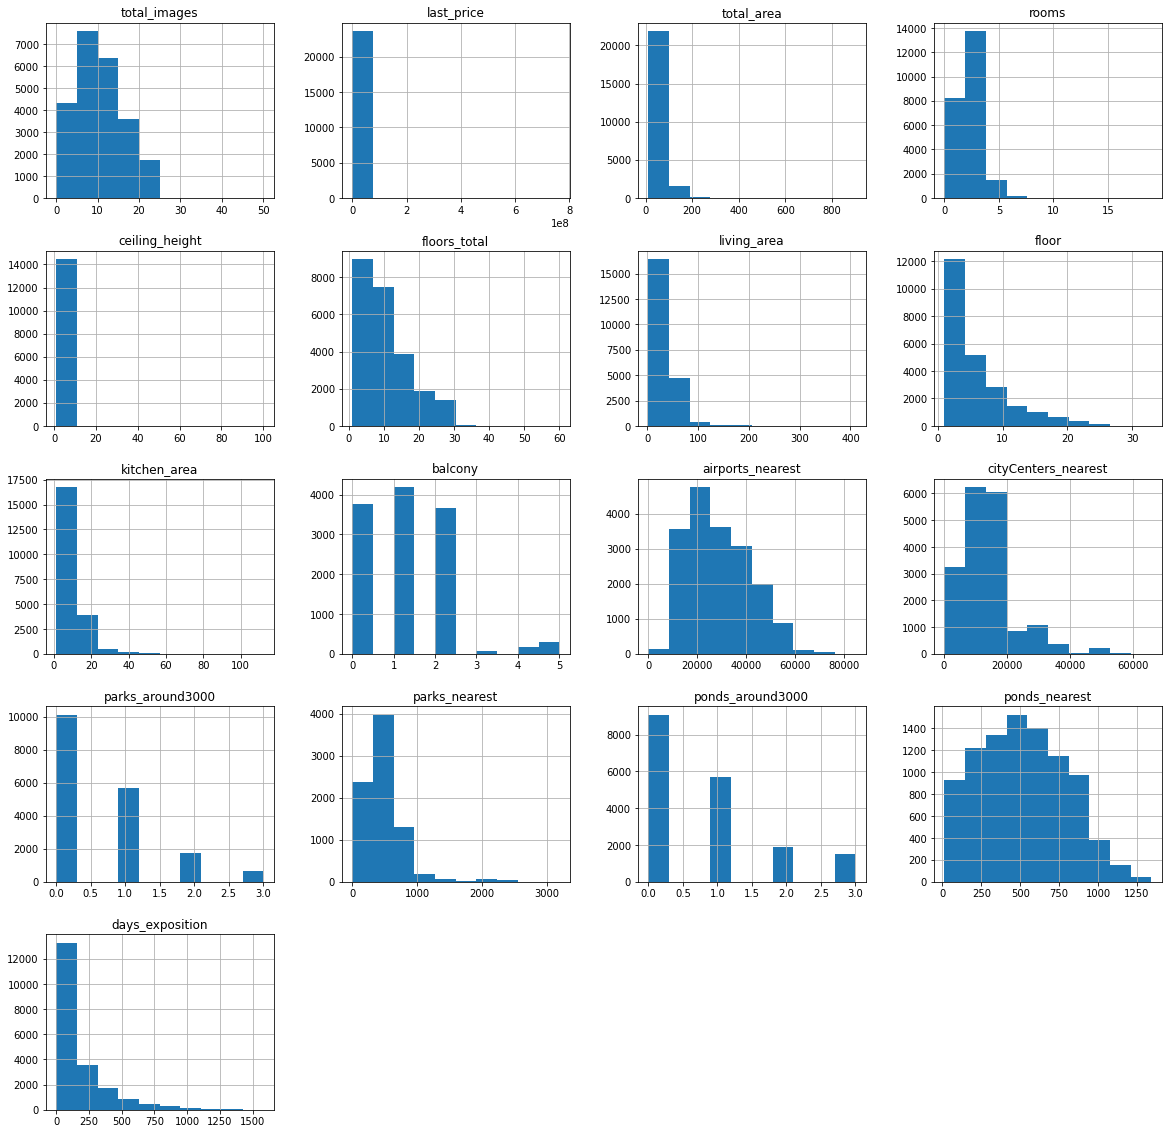

In [29]:
data.hist(figsize=(20, 20))

<b> Вывод:</b>

- Благодарю методу info(), видем что, в данных есть значимое количество пропусков;
- Также, методом head(), есть понимание, что в столбцах `is_apartment`, `first_day_exposition`, `last_price`, `floors_total`, `balcony` неверно указаны типы данных. Также можно изменить тип данных в столбцах с расстояниями до парков, аэропорта, центра с `float` на `int`;
- Применив метод describe(), видно что, в следующих столбах есть выбросы:
    - `total_image` - все, что больше 26
    - `last_price` - все, что больше 11 900 000
    - `total_area` - все, что больше 114,75
    - `rooms` - все, что больше 6
    - `floors_total` - все, что больше 33
    - `living_area` - все, что больше 77,85
    - `kitchen_area` - все, что больше 19,5
    - `airport_neasrest` - все, что больше 65305
    - `cityCenters_nearest` - все, что больше 26876
    - `parks_nearest` - все, что больше 1098
    - `days_exposition` - все, что больше 513
- Выведя гистрограммы для каждого столбца есть следующее понимание о распределении данных в них:
    - Столбцы с распределением Пуассона:
        - `rooms`
        - `total_images`
        - `balcony`
        - `cityCenters_nearest`
        - `parks_neasrest`
    - Столбцы с геометрическим распределением:
        - `total_area`
        - `floors_total`
        - `living_area`
        - `floor`
        - `kitchen_area`
        - `days_exposition`
    - Столбцы с биномальным распределением:
        - `ponds_nearest`
        - `airport_nearest`

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>  Так, вот открыли мы и гистограммы, и info(), и describe() а вывод не написали. Есть ли пропуски? Неправильные типы данных? Выбросы и аномалии? Нормальные ли распределения?

<div class="alert alert-info">
<b>Благодарю за замечания, сделал отдельный вывод и описал все, что заметил :)</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вижу, молодец)

### Предобработка данных

In [30]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Из информации выше, мы видим, что пропущенные значения есть в следующих столбцах:
- высота потолков
- всего этажей в доме
- жилая площадь
- апартаменты
- площадь кухни
- число балконов
- название населённого пункта
- расстояние до ближайшего аэропорта в метрах
- расстояние до центра города
- расстояние до ближайшего парка
- число водоёмов в радиусе 3 км
- расстояние до ближайшего водоёма
- число парков в радиусе 3 км
- сколько дней было размещено объявление

Пропуски значений в следующих столбцах случайные и их можно заменить:
- число балконов -> `0`
- апартаменты -> `False`

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> А вот и вывод для первого раздела!

In [31]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Поддерживаю)

In [32]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропуски в остальных столбцах, где это возможно, медианным значениям, исходя из количества комнат.

In [33]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform("median"))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform("median"))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отличная идея!

In [34]:
#data['days_exposition'].median()
#data['days_exposition'] = data['days_exposition'].fillna(95)

<div class="alert alert-info">
<b>Согласен, закомментировал этот пункт, те объявления где указано `NaN` еще не сняты с публикации</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Не согласен. Отражает ли такая замена действительность? В чем причина появления пропусков? Чтобы ответить на этот вопрос, нужно посмотреть распределение пропусков по годам
    

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ты полностью прав!

In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [36]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Из списка типов столбцов выше видно, что необходимо сменить типы данных у столбцов перечисленных в выводе первого раздела






In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data = data.astype({"last_price" : "int64", "airports_nearest" : "Int64", "cityCenters_nearest":"Int64", "parks_around3000":"Int64", "parks_nearest":"Int64", "ponds_around3000":"Int64", "ponds_nearest":"Int64"})

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Действительно, дату нужно привести к дате

In [38]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest                 Int64
cityCenters_nearest              Int64
parks_around3000                 Int64
parks_nearest                    Int64
ponds_around3000                 Int64
ponds_nearest                    Int64
days_exposition                float64
dtype: object

Выведя типы стоблцов мы видим, что типы данных успешно сменились на верные

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Пока у нас много столбцов с неправильными типами: цена, количество прудов и подобные. Надеюсь, что дальше мы типы поменяем

<div class="alert alert-info">
<b>Учел этот момент и сменил типы данных в остальных столбцах, где это было необходимо</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Увидел, хорошо)

Сменим наименование столбца `cityCenters_nearest` на `snake_case`, то есть `city_center_nearest`

In [39]:
data = data.rename(columns={"cityCenters_nearest" : "city_centers_nearest"})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Согласен, о правильном типе данных не нужно забывать

In [40]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Выведя уникальные значения из столбца "Название населённого пункта", мы видим, что есть дубликаты, записаные разным способом.
Чтобы избавится от дубликатов, применим функцию, котороя перезапишет в столбец `locality_name` только имена собственные населенных пунктов, отбросив тип населенного пункта (поселок, деревная, поселок городского типа и т.д.).

In [41]:
def  only_upper(row):
    return re.sub(r'\b[а-яё]+\s*', "", str(row['locality_name'])).strip()
data['locality_name'] = data.apply(only_upper, axis=1)

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Поддерживаю

In [42]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Выведя список уникальных значений населенных пунктов, мы видим, что явных повторений более нет

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Можем сделать лучше, если уберем все буквы "ё", а также навзания типов поселений

<div class="alert alert-info">
<b>Мое решение показалось мне более рациональным :)</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Не спорю)

In [43]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Из списка выше видим, что некоторые значения сильно выбиваются, к примеру 26, 32, 24. Очевидно, что в таких значения, неверно указана разделительная запятая. Также, есть значения, которые явно выбиваются, к примеру, такие значения как 1, 100 и т.д., они являются выбросами.

In [44]:
data['ceiling_height'] = np.where(data['ceiling_height'] > 6, data['ceiling_height']/10, data['ceiling_height'])
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  0.8 ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Поддерживаю

Скорректировав значения, видим что, есть значения, которые явно выбиваются, к примеру, такие значения как 0.8, 10 и т.д., они являются выбросами.

<AxesSubplot:>

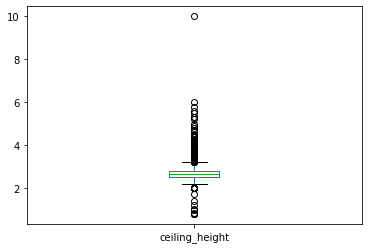

In [45]:
data['ceiling_height'].plot(kind='box')

In [46]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform("median"))
data = data[(data['ceiling_height'] <= 6.1) & (data['ceiling_height'] >= 1.5) & (data['ceiling_height'] != 0)]

Заполним, также пропуски медианным значением в этом столбце

In [47]:
data['ceiling_height'].unique()

array([2.7 , 2.75, 2.55, 2.6 , 3.03, 2.65, 2.66, 2.5 , 2.67, 2.56, 3.  ,
       3.05, 2.8 , 2.9 , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45,
       5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31,
       4.65, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.99, 3.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Можно и медианой, но лучше группировку и медиану, ты так уже делал выше. Так ближе к реальности

<div class="alert alert-info">
<b>Не учтел этот момент, что можно сгрупировать данные по общей площади и заполнить медианным значением! Благодарю за замечание!</b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А не лучше ли будет, если группирвока будет произведена по количеству этажей в доме? Например мы же знаем, что есть хрущевки

In [48]:
#data['floors_total'].describe()

In [49]:
data['floors_total'] = data['floors_total'].fillna(data.groupby('floor')['floors_total'].transform("median"))

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А так можно? Не появятся ли квартиры, которые располаагются на более высоком этаже, чем всего есть в квартире?

<div class="alert alert-info">
<b>Согласен, было опрометчивым решением, заполнить пропуски просто медианным значением. Сгруппировал данные по этажам</b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Я бы вообще оставил эти пропуски, не вижу здесь методов заполнения пропусков

In [50]:
kitchen_area_coeff = (data['kitchen_area'] / data['total_area']).median()
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['total_area'].transform(lambda x: x*kitchen_area_coeff))

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Идея для плоащи кухни - можнонайти отношение кухонной площади ко всей, а затем на полученный коэффициент умножить всю площадь

<div class="alert alert-info">
<b>Большое спасибо за подсказку, надеюсь моя реализация верна -_0</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо)

In [51]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5531
city_centers_nearest     5508
parks_around3000         5507
parks_nearest           15569
ponds_around3000         5507
ponds_nearest           14550
days_exposition          3175
dtype: int64

Сделаем срезы, чтобы убрать выбросы в столбцах указанных в выводе первого пункта

Срезу будем делать только в тех местах, где это необходимо

In [52]:
data = data.query('total_area < 114.75')
data = data.query('rooms < 6')
data = data.query('living_area < 77.85')
data = data.query('kitchen_area < 19.5')
data = data.query('last_price < 11.9*10**6')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20911 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20911 non-null  int64         
 1   last_price            20911 non-null  int64         
 2   total_area            20911 non-null  float64       
 3   first_day_exposition  20911 non-null  datetime64[ns]
 4   rooms                 20911 non-null  int64         
 5   ceiling_height        20911 non-null  float64       
 6   floors_total          20911 non-null  float64       
 7   living_area           20911 non-null  float64       
 8   floor                 20911 non-null  int64         
 9   is_apartment          20911 non-null  bool          
 10  studio                20911 non-null  bool          
 11  open_plan             20911 non-null  bool          
 12  kitchen_area          20911 non-null  float64       
 13  balcony         

Общий процент среза данных составил 13%

Выведем все максимальные и минимальные значения в датафрейм, для граничных значений

In [54]:
data.max()

total_images                             39
last_price                         11894400
total_area                            114.3
first_day_exposition    2019-05-03 00:00:00
rooms                                     5
ceiling_height                          5.8
floors_total                           60.0
living_area                            77.8
floor                                    33
is_apartment                           True
studio                                 True
open_plan                              True
kitchen_area                          19.42
balcony                                 5.0
locality_name                       Янино-1
airports_nearest                      84869
city_centers_nearest                  65968
parks_around3000                          3
parks_nearest                          3190
ponds_around3000                          3
ponds_nearest                          1344
days_exposition                      1580.0
dtype: object

In [55]:
data.min()

total_images                              0
last_price                           430000
total_area                             12.0
first_day_exposition    2014-11-27 00:00:00
rooms                                     0
ceiling_height                         1.75
floors_total                            1.0
living_area                             2.0
floor                                     1
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            1.3
balcony                                 0.0
locality_name                           nan
airports_nearest                          0
city_centers_nearest                    208
parks_around3000                          0
parks_nearest                             1
ponds_around3000                          0
ponds_nearest                            16
days_exposition                         1.0
dtype: object

Из полученных данных, видно, в датафрейме более нет выбросов и аномалий.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Подскажи, а сколько процентов данных мы удалили? Принято, что в качестве выбросов можно удалить не более 10%. Если чуть-чуть больше, то окей

<div class="alert alert-info">
<b>Добавил после среза info() и посчитал процент среза даных</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Точно исправили? Было у нас 23699 столбцов, стало 12671. Думаю, что все-таки пока срезано слишкмо много

<div class="alert alert-info">
<b>Нашел в чем таилась проблема</b>
    
Пришлось считать, сколько строк осталось после каждого действия с датафреймом.\
По итогу проблема была в срезе столбца `ceiling_height`, сначала делал срез потом заполнения, а надо было наоборот :facepalm:
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Молодец, что добрался до истины, я именно этого и хотел. Теперь идем дальше

### Добавление новых столбцов в датафрейм

Создадим новый столбец с ценой одного квадратного метра;

In [56]:
data['one_metr_cost'] = data['last_price']/data['total_area']
data['one_metr_cost'].sort_values(ascending=True)

14911      7962.962963
4405       9615.384615
11351     10185.185185
9581      10368.663594
23484     10561.797753
             ...      
6475     248484.848485
19780    262711.864407
7355     276000.000000
19807    292307.692308
16212    312240.000000
Name: one_metr_cost, Length: 20911, dtype: float64

Создадим новый столбец с днями неделями публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [57]:
data['exposition_day_of_week']=data['first_day_exposition'].dt.dayofweek
data['exposition_day_of_week'].value_counts()

3    3759
1    3690
4    3549
2    3488
0    3185
5    1723
6    1517
Name: exposition_day_of_week, dtype: int64

Создадим новый столбец с месяцем публикации;

In [58]:
data['exposition_month']=data['first_day_exposition'].dt.month
data['exposition_month'].value_counts()

2     2337
3     2295
4     2108
11    2081
10    1896
9     1728
6     1568
8     1545
7     1474
12    1446
1     1313
5     1120
Name: exposition_month, dtype: int64

Создадим новый столбец с годом публикации;

In [59]:
data['exposition_year']=data['first_day_exposition'].dt.year
data['exposition_year'].value_counts()

2018    7670
2017    7246
2019    2535
2016    2418
2015     961
2014      81
Name: exposition_year, dtype: int64

Создадим новый столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)

In [60]:
def type_of_floors (data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] < data['floors_total']:
        return 'другой'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'не найдено'
data['type_of_floor'] = data.apply(type_of_floors, axis=1)
data['type_of_floor'].value_counts()

другой       15301
последний     2878
первый        2732
Name: type_of_floor, dtype: int64

Создадим новый столбец с расстоянием до центра города в километрах

In [61]:
data['city_centers_nearest_in_km'] = (data['city_centers_nearest']/10**3).apply(np.floor)
data['city_centers_nearest_in_km'].sort_values(ascending=False)

577      65.0
20746    65.0
9640     65.0
5340     65.0
5218     64.0
         ... 
23683    <NA>
23692    <NA>
23695    <NA>
23696    <NA>
23698    <NA>
Name: city_centers_nearest_in_km, Length: 20911, dtype: Float64

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Столбцы добавлены верно

### Исследовательский анализ данных

##### Общая площадь

<AxesSubplot:>

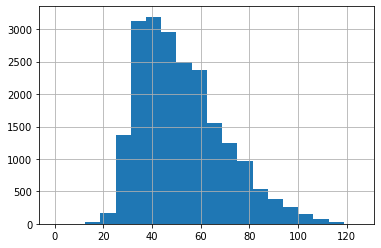

In [62]:
data['total_area'].hist(range=(0,125), bins=20)

In [63]:
data['total_area'].describe()

count    20911.000000
mean        52.146917
std         17.367539
min         12.000000
25%         38.725000
50%         48.300000
75%         62.400000
max        114.300000
Name: total_area, dtype: float64

Из гистрограммы видно, что данные распределенны согласно распределению Пуассона. \
При это большая часть объявлений общей площадью находится в диапозоне от 39 до 63 кв.м. \
Средняя и медаинная площадь близки к друг другу и соответственно равно 52.26 и 48.7 кв.м.

##### Жилая площадь

<AxesSubplot:>

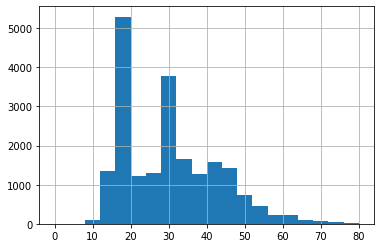

In [64]:
data['living_area'].hist(range=(0,80), bins=20)

In [65]:
data['living_area'].describe()

count    20911.000000
mean        30.021992
std         12.543090
min          2.000000
25%         18.000000
50%         29.300000
75%         39.000000
max         77.800000
Name: living_area, dtype: float64

Гистрограмма также имеет вид Пуассонова распределения и имеет два выраженных пика на 18 кв.м. и 30 кв.м. \
При этом большая часть квартир расположенная в диапозоне площадью 18 кв.м. до 39 кв.м. \
Среднее и медианное значение практически равны и отличаются лишь на 0.63 кв.м.

##### Площадь кухни

<AxesSubplot:>

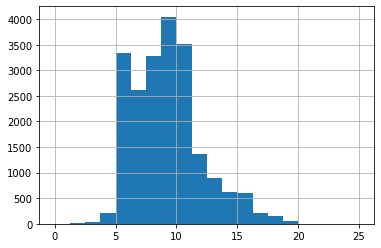

In [66]:
data['kitchen_area'].hist(range=(0,25), bins=20)

In [67]:
data['kitchen_area'].describe()

count    20911.000000
mean         9.156581
std          2.800333
min          1.300000
25%          7.000000
50%          9.000000
75%         10.700000
max         19.420000
Name: kitchen_area, dtype: float64

Гистограмма имеет выраженные пиковые значения практически на половине своей площади, с небольшой просадкой пика на значение в 6 кв.м. \
Гистрограмма также иметт Пуасоново распределение \
Основная часть квартир располодилась в диапозоне от 7 до 10.7 кв.м. \
При этом среднее значение незначительного отклонено от медианного значения, а конкретно на 0,14 кв.м.

##### Цена объекта

<AxesSubplot:>

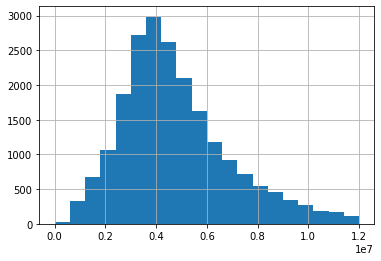

In [68]:
data['last_price'].hist(range=(0, 12000000), bins=20)

In [69]:
data['last_price'].describe()

count    2.091100e+04
mean     4.740128e+06
std      2.136667e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.350000e+06
75%      5.870000e+06
max      1.189440e+07
Name: last_price, dtype: float64

Гистрограммы имеет практические нормальное распределение с пиков в центре и небольшим отклонением данных в положительную сторону \
IQR в данном столбце относительно небольшой и составляет всего 2,6 * 10^6, то есть в 2 раза меньше медианного значения 

##### Количество комнат

<AxesSubplot:>

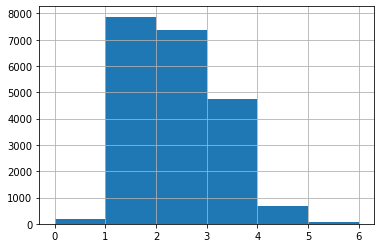

In [70]:
data['rooms'].hist(range=(0,6), bins=6)

In [71]:
data['rooms'].describe()

count    20911.000000
mean         1.904787
std          0.885492
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

Гистограмма имеет также Пуассоново распредление с двумя пиками в районе однокомнатных и двухкомнатных квартир\
Медианное и среднее в данном графике равны, если их округлить до целых чисел

##### Высота потолков

<AxesSubplot:>

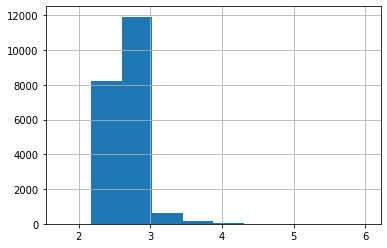

In [72]:
data['ceiling_height'].hist(range=(1.75,6), bins=10)

In [73]:
data['ceiling_height'].describe()

count    20911.000000
mean         2.676058
std          0.193423
min          1.750000
25%          2.550000
50%          2.640000
75%          2.750000
max          5.800000
Name: ceiling_height, dtype: float64

Гистрограмма близка к нормальному распределению \
Большая часть квартир имеет высоту потолков с 2.55 до 2.7 метров \
Среднее и медианное значение также, практически равны

##### Этаж квартиры

<AxesSubplot:>

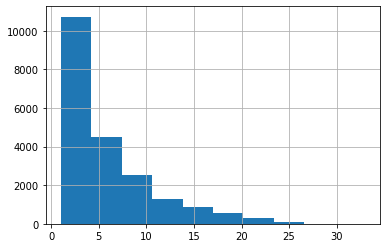

In [74]:
data['floor'].hist()

In [75]:
data['floor'].describe()

count    20911.000000
mean         5.874372
std          4.885680
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Гистрограмма имеет геометрическое распределение, то есть пик в самом начале с последующим уменьшением \
Квартир этажом выше 6 очень мало. Квартир чей этаж выше 27, практически нет

##### Тип этажа квартиры

<AxesSubplot:>

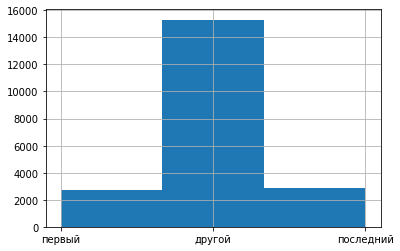

In [76]:
data['type_of_floor'].hist(bins=3)

In [77]:
data['type_of_floor'].describe()

count      20911
unique         3
top       другой
freq       15301
Name: type_of_floor, dtype: object

Ярко выраженное количество квартир с типом этажа "другой" и практически одинаковое количество квартир расположенные на крайних этажах

##### Общее количество этажей в доме

<AxesSubplot:>

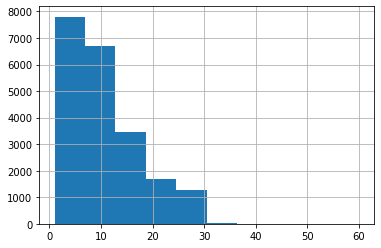

In [78]:
data['floors_total'].hist()

In [79]:
data['floors_total'].describe()

count    20911.000000
mean        10.773277
std          6.623827
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Распределение Пуассона, имеет три пика \
Большая часть квартир имеет этажность дома с 5 по 16 этаж \
Квартир расположенных в домах высотой более 30 этажей практически нет

##### Расстояние до центра города в метрах

<AxesSubplot:>

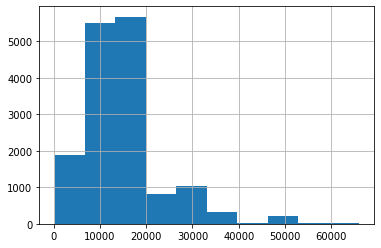

In [80]:
data['city_centers_nearest'].hist(bins=10)

In [81]:
data['city_centers_nearest'].describe()

count    15553.000000
mean     15079.394008
std       8503.858312
min        208.000000
25%      10735.000000
50%      13682.000000
75%      16738.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Квартир расположеных в центре достаточно мало, основная концентрация на расстоянии 10-16 км \
При этом средняя отдаленность квартир от центра равно 15 км, а медианное расстояние 13.6 км

##### Расстояние до ближайшего аэропорта

<AxesSubplot:>

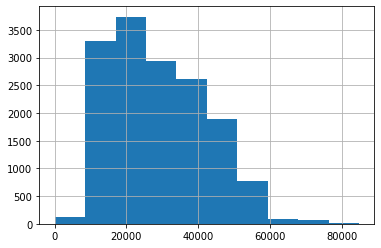

In [82]:
data['airports_nearest'].hist(bins=10)

In [83]:
data['airports_nearest'].describe()

count    15542.000000
mean     28927.112598
std      13040.346149
min          0.000000
25%      17950.000000
50%      27143.000000
75%      37717.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Распределение удаленности квартир от аэропортов близко к нормальному \
Медианное расстояние равно 27 км, а средняя удаленость равна 29 км \
Большая часть квартир находится на расстояние удаленности от 18 до 37 км

###### Расстояние до ближайшего парка

<AxesSubplot:>

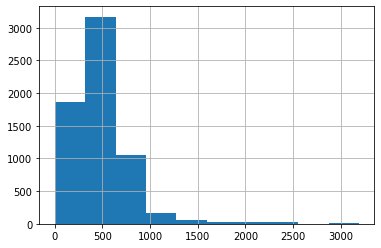

In [84]:
data['parks_nearest'].hist(bins=10)

In [85]:
data['parks_nearest'].describe()

count    6415.000000
mean      487.720499
std       325.838418
min         1.000000
25%       289.000000
50%       456.000000
75%       613.500000
max      3190.000000
Name: parks_nearest, dtype: float64

Распределение также близко к нормальному со смещение центра к нулю \
Среднее и медианное значения также близки и равны 472.5 и 455 соответственно\
Почти все квартиры имеет в расположении менее 1 км парк

##### День и месяц публикации объявления

<AxesSubplot:>

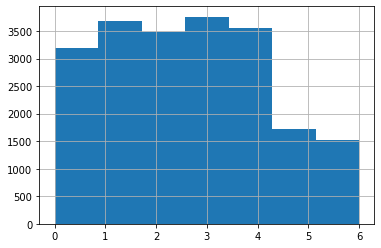

In [86]:
data['exposition_day_of_week'].hist(range=(0,6), bins=7)

In [87]:
data['exposition_day_of_week'].describe()

count    20911.000000
mean         2.575487
std          1.793215
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_day_of_week, dtype: float64

Осноная масса объявлений размещается в будни дни, на выходных количество размещенных объявлений падает вдвое\
При этом самые популярные дни для размещения объявлений являются вторник и четверг

<AxesSubplot:>

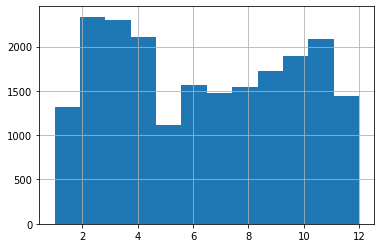

In [88]:
data['exposition_month'].hist(range=(1,12), bins=12)

In [89]:
data['exposition_month'].describe()

count    20911.000000
mean         6.395916
std          3.490571
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

Основной пик размещения объявлений приходится на весенний период с февраля по апрель.\
Наименьшее количество объявлений размещается в мае.\
После чего идет заметный прирост до ноября месяц, с сильным падением количество размещаемых объявлений в декабре с сохранением тендеции в январе.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим удаление выбросов и веренмся сюда. А еще было бы здорово ,если бы в выводах по разделам мы использовали важные численные показатели, такие как медиана и среднее. А еще попробуй определить типы распределний

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено

##### Время продажи квартир

<AxesSubplot:>

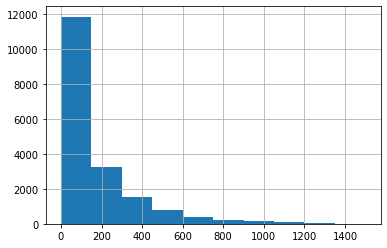

In [90]:
data['days_exposition'].hist(range=(0, 1500), bins=10)

<AxesSubplot:>

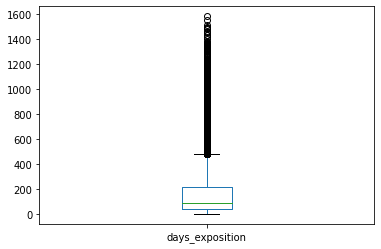

In [91]:
data['days_exposition'].plot(kind='box')

In [92]:
data['days_exposition'].describe()

count    18379.000000
mean       171.467272
std        209.686848
min          1.000000
25%         43.000000
50%         90.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [93]:
data['days_exposition'].mean()

171.46727243049133

Среднее время продажи квартиры равно 152 дня

In [94]:
data['days_exposition'].median()

90.00000000000001

Медианное время продажи квартиры 95

Продажу можно считать быстрой если она завершилась в первые 44 дня.\
Долгой является так продажа, которая не состоялась после 218 дня.\
Продажа квартиры после 500 дня, практически невозможна.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим удаление выбросов и вернемся. А быстрые и медленные продажи можно определять, опираясь на квантили, кстатаи

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Быстыре и медленные продажи определены верно)

##### Влияние факторов на общую стоимость объекта

<b>Зависимость цены от общей площади</b>

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

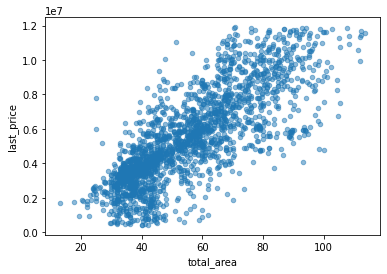

In [95]:
total_area_corr_with_price = data.pivot_table(index='last_price', values='total_area', aggfunc='median').reset_index()
total_area_corr_with_price.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5) 

In [96]:
total_area_corr_with_price.corr()

,last_price,total_area
last_price,1.000000,0.787942
total_area,0.787942,1.000000


<b>Вывод:</b> Из корреляции видно, что общая площадь квартиры напрямую связана с ее стоимостью

<b>Зависимость цены от жилой площади</b>

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

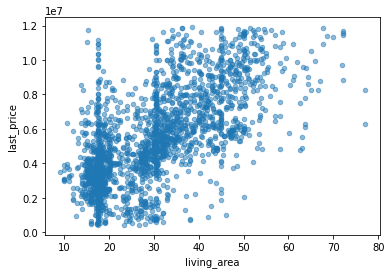

In [97]:
living_area_corr_with_price = data.pivot_table(index='last_price', values='living_area', aggfunc='median').reset_index()
living_area_corr_with_price.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5) 

In [98]:
living_area_corr_with_price.corr()

,last_price,living_area
last_price,1.000000,0.647459
living_area,0.647459,1.000000


<b>Вывод:</b> Зависимость цены от жилой площади также связана, но немного меньше, нежели "общая площадь" квартиры

<b>Зависимость цены от площади кухни</b>

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

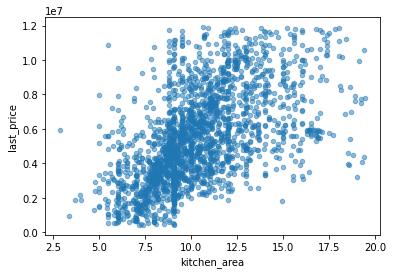

In [99]:
kitchen_area_corr_with_price = data.pivot_table(index='last_price', values='kitchen_area').reset_index()
kitchen_area_corr_with_price.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5) 

In [100]:
kitchen_area_corr_with_price.corr()

,last_price,kitchen_area
last_price,1.000000,0.556383
kitchen_area,0.556383,1.000000


<b>Вывод:</b> Площадь кухни оказывает не слабую зависимость на стоимость квартиры

<b>Зависимость цены от количества комнат</b>

Сгруппируем данные по количеству комнат и рассмотрим корреляию для медианного и среднего значений каждого типа квартир

In [101]:
rooms_corr_with_price_mean = data.groupby('rooms')['last_price'].mean().reset_index()
rooms_corr_with_price_mean.corr()

,rooms,last_price
rooms,1.000000,0.996675
last_price,0.996675,1.000000


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

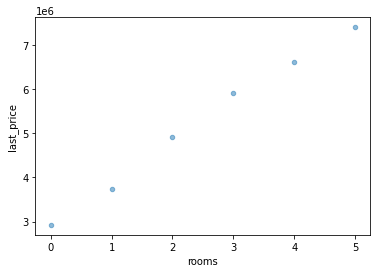

In [102]:
rooms_corr_with_price_mean.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5) 

In [103]:
rooms_corr_with_price_median = data.groupby('rooms')['last_price'].median().reset_index()
rooms_corr_with_price_median.corr()

,rooms,last_price
rooms,1.000000,0.999796
last_price,0.999796,1.000000


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

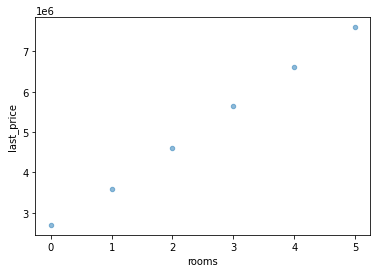

In [104]:
rooms_corr_with_price_median.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5) 

<b>Вывод:</b> Стоимость квартиры напрямую зависит от количества комнат

<b>Зависимость цены от этажа, на котором расположена квартира</b>

In [105]:
type_of_floor_corr_with_price_mean = data.groupby('type_of_floor')['last_price'].mean().reset_index()
type_of_floor_corr_with_price_mean.sort_values('last_price',ascending=True)

,type_of_floor,last_price
1,первый,4.042030e+06
2,последний,4.340442e+06
0,другой,4.939952e+06


In [106]:
type_of_floor_corr_with_price_median = data.groupby('type_of_floor')['last_price'].median().reset_index()
type_of_floor_corr_with_price_median.sort_values('last_price',ascending=True)

,type_of_floor,last_price
1,первый,3790000
2,последний,3990000
0,другой,4500000


<b>Вывод:</b> Этажность квартиры также напрямую связана со стоимостью, дешевле всего квартиры на первом, потом на последнем этаже. \
Квартиры расположенные не на крайних этажах стоят дороже.

<b>Зависимость цены от дня недели размещения объявления</b>

In [107]:
exposition_day_of_week_corr_with_price_median = data.groupby('exposition_day_of_week')['last_price'].median().reset_index()
exposition_day_of_week_corr_with_price_median.sort_values('last_price', ascending=False)

,exposition_day_of_week,last_price
2,2,4400000
1,1,4399500
0,0,4350000
3,3,4320000
4,4,4300000
5,5,4300000
6,6,4300000


In [108]:
exposition_day_of_week_corr_with_price_mean = data.groupby('exposition_day_of_week')['last_price'].mean().reset_index()
exposition_day_of_week_corr_with_price_mean.sort_values('last_price', ascending=False)

,exposition_day_of_week,last_price
2,2,4.785001e+06
1,1,4.781033e+06
3,3,4.758380e+06
0,0,4.732906e+06
4,4,4.717684e+06
6,6,4.671807e+06
5,5,4.641598e+06


<b>Вывод:</b> Стоимость квартир также связана со днем недели, когда было размещено обявление. Дешевле всего размещают квартиры в выходные дни. Объявления с самой высокой стоимостью приходятся на середину недели.

<b>Зависимость цены от месяца размещения объявления</b>

In [109]:
exposition_month_corr_with_price_median = data.groupby('exposition_month')['last_price'].median().reset_index()
exposition_month_corr_with_price_median.corr()

,exposition_month,last_price
exposition_month,1.000000,0.022731
last_price,0.022731,1.000000


<AxesSubplot:xlabel='exposition_month', ylabel='last_price'>

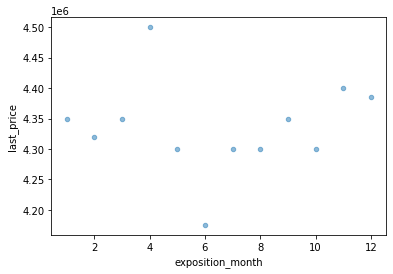

In [110]:
exposition_month_corr_with_price_median.plot(x='exposition_month', y='last_price', kind='scatter', alpha=0.5) 

In [111]:
exposition_month_corr_with_price_mean = data.groupby('exposition_month')['last_price'].mean().reset_index()
exposition_month_corr_with_price_mean.corr()

,exposition_month,last_price
exposition_month,1.000000,0.182502
last_price,0.182502,1.000000


<AxesSubplot:xlabel='exposition_month', ylabel='last_price'>

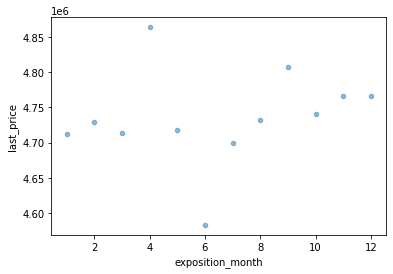

In [112]:
exposition_month_corr_with_price_mean.plot(x='exposition_month', y='last_price', kind='scatter', alpha=0.5) 

<b>Вывод:</b> Месяц, в котором было размещено объявление абсолютно не влияет на стоимость квартиры.

<b>Зависимость цены от года размещения объявления</b>

In [113]:
exposition_year_corr_with_price_median = data.groupby('exposition_year')['last_price'].median().reset_index()
exposition_year_corr_with_price_median.corr()

,exposition_year,last_price
exposition_year,1.000000,-0.510596
last_price,-0.510596,1.000000


<AxesSubplot:xlabel='exposition_year', ylabel='last_price'>

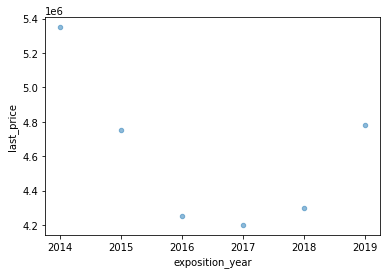

In [114]:
exposition_year_corr_with_price_median.plot(x='exposition_year', y='last_price', kind='scatter', alpha=0.5) 

In [115]:
exposition_year_corr_with_price_mean = data.groupby('exposition_year')['last_price'].mean().reset_index()
exposition_year_corr_with_price_mean.corr()

,exposition_year,last_price
exposition_year,1.000000,-0.598079
last_price,-0.598079,1.000000


<AxesSubplot:xlabel='exposition_year', ylabel='last_price'>

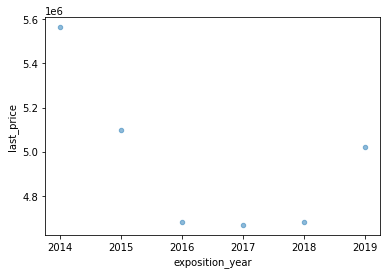

In [116]:
exposition_year_corr_with_price_mean.plot(x='exposition_year', y='last_price', kind='scatter', alpha=0.5) 

<b>Вывод:</b> Стоимость квартир имеет слабую корреляцию с годом, когда было размещено объявление

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Опять же исправим удаление выбросов и веренмся сюда. Было бы здорово здесь посмотреть на графикик, кстати

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Влияние параметров на цену определено верно

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [117]:
meter_cost = data.pivot_table(index='locality_name', values='one_metr_cost', aggfunc=('median', 'count'))
meter_cost.columns=['count_composition', 'one_metr_median']
top_10 = meter_cost.sort_values('count_composition', ascending=False).round().head(10).reset_index()
top_10

,locality_name,count_composition,one_metr_median
0,Санкт-Петербург,13206,101911.0
1,Мурино,576,86312.0
2,Кудрово,444,95831.0
3,Шушары,432,76876.0
4,Всеволожск,387,65649.0
5,Колпино,331,74722.0
6,Пушкин,326,98046.0
7,Парголово,322,91780.0
8,Гатчина,300,67672.0
9,Выборг,223,58108.0


Населенный пункт с самой высокой стоимостью за квадратный метр "Зеленогорск"

In [118]:
max_one_metr_cost = top_10['one_metr_median'].max()
top_10.query('one_metr_median == @max_one_metr_cost')

,locality_name,count_composition,one_metr_median
0,Санкт-Петербург,13206,101911.0


Населенный пункт с самой низкой стоимостью за квадратный метр "Вахнова Кара"

In [119]:
min_one_metr_cost = top_10['one_metr_median'].min()
top_10.query('one_metr_median == @min_one_metr_cost')

,locality_name,count_composition,one_metr_median
9,Выборг,223,58108.0


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  То же самое - исправим выбросы и веренмся

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> А все-таки мы считаем самую дорогую и самую дешевую недвижимость по топ-10 или по всему датафрейму?

<div class="alert alert-info">
<b>Прошу прощения, не полностью в ник в вопрос задачи, поправил ^_^</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено!

#### Средняя цена каждого километра от центра города в Санкт-Петербурге

In [120]:
data['price_km'] = data['last_price'] / data['city_centers_nearest_in_km']
in_center_mean = data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_centers_nearest_in_km')\
                                                                  .mean()['one_metr_cost'].reset_index()
in_center_median = data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_centers_nearest_in_km')\
                                                                  .median()['one_metr_cost'].reset_index()

<AxesSubplot:xlabel='city_centers_nearest_in_km', ylabel='one_metr_cost'>

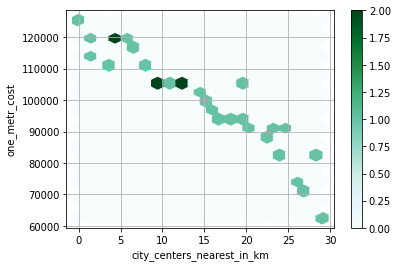

In [121]:
in_center_mean.plot(x='city_centers_nearest_in_km', y='one_metr_cost', kind='hexbin', gridsize=20, figsize=(6, 4), sharex=False, grid=True) 

In [122]:
in_center_mean.corr()

,city_centers_nearest_in_km,one_metr_cost
city_centers_nearest_in_km,1.000000,-0.935097
one_metr_cost,-0.935097,1.000000


<AxesSubplot:xlabel='city_centers_nearest_in_km', ylabel='one_metr_cost'>

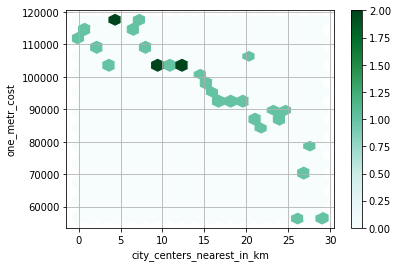

In [123]:
in_center_median.plot(x='city_centers_nearest_in_km', y='one_metr_cost', kind='hexbin', gridsize=20, figsize=(6, 4), sharex=False, grid=True) 

In [124]:
in_center_median.corr()

,city_centers_nearest_in_km,one_metr_cost
city_centers_nearest_in_km,1.000000,-0.867598
one_metr_cost,-0.867598,1.000000


<b>Вывод:</b> Из графиков и коэффициентов корелляции видно, что чем дальше квартира расположена от центра города, тем меньше ее стоимость за квадратный метр.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  И здесь

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все верно)

### Общий вывод

Основные факторы влиящие на цену квартиры:
- Удаленность от центра города
- Общая площадь
- Жилая площадь
- Количество комнат
- Этаж, на котором расположена квартира

Также, важным фактором для продажи является день недели, когда было размещено объявление. Больше всего объявлений размещается в будни дни, при этом объявления о "дорогих" квартирах в основном размещаются во вторник и четверг.

Выявили, что успешная продажа квартиры в первые 40 дней с момента размещения объявления. Если объявление "висит" более 230 дней, то шанси на продажи близки к нулю.

При этом месяц, когда размещается обявление практически никак не влияет на ее стоимость и результат продажи. Что не скажешь о годе, в котором размещено объявление, есть небольшая корреляция, говорящая о том, что стоимость квартир, в любом случае растет.

Больше всего продается квартир с площадью от 39 до 60 кв.м., при этом это в основном однокомнатные или двухкомнатные квартиры. Основная этажность квартир с 2 по 8, что означает, что домов с большой этажность на рынке в разы меньше. При этом ярко выраженно разница в стоимости квартир расположенных на крайних этажах, они заметно дешевле остальных.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Слишком усердно почистили даатфрейм от выбросов

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
 Владислав, спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    2. На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Не все пропуски заполнены верно

    2. В качестве выбросов удалена почти половина датафрейма
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
 Владислав, пока осталась та же проблема

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v3**:
 Владислав, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!